In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.sample(1)

# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
852,flat,vatika sovereign park,sector 99,3.25,3360.0,9672.0,Super Built up area 3360(312.15 sq.m.),4,4,3+,servant room,2.0,Na,Within 3 months,"['The Esplanade Mall', 'Dwarka Expressway', 'KMP Expressway', 'Imperial Heritage School', 'SGT University', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Quality Inn Gurgaon', 'SkyJumper Trampoline Park']",NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


# 1. areaWithType

In [5]:
df[['Area','areaWithType']].sample(5)

,Area,areaWithType
3706,1700.0,Super Built up area 1700(157.94 sq.m.)
1197,1433.0,Carpet area: 1433 (133.13 sq.m.)
3486,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet area: 1855 sq.ft. (172.34 sq.m.)
2629,3194.0,Built Up area: 2800 (260.13 sq.m.)
114,526.0,Super Built up area 632(58.71 sq.m.)Carpet area: 532 sq.ft. (49.42 sq.m.)


In [4]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [6]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [8]:
# Extract Super Built up area and convert to sqft if needed

df['super_built_up_area']= df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area']= df.apply(lambda x:convert_to_sqft(x['areaWithType'],x['super_built_up_area']), axis =1)

In [10]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [11]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [13]:
df[["price",'property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
2413,3.20,house,2230.0,Plot area 2160(200.67 sq.m.),NaN,NaN,NaN
1402,1.45,house,1812.0,Built Up area: 1800 (167.23 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.),NaN,1800.0,900.0
1114,5.90,flat,3375.0,Super Built up area 3363(312.43 sq.m.),3363.0,NaN,NaN
47,0.72,flat,1447.0,Super Built up area 1457(135.36 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.),1457.0,NaN,849.0
2823,0.21,flat,394.0,Carpet area: 394 (36.6 sq.m.),NaN,NaN,394.0


In [14]:
df.duplicated().sum()

122

In [16]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
2016,1.17,flat,1671.0,Super Built up area 1671(155.24 sq.m.)Built Up area: 1660 sq.ft. (154.22 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),1671.0,1660.0,1650.0
2614,2.28,flat,2103.0,Super Built up area 2103(195.38 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1257 sq.ft. (116.78 sq.m.),2103.0,1750.0,1257.0
1589,9.30,flat,3731.0,Super Built up area 3931(365.2 sq.m.)Built Up area: 3831 sq.ft. (355.91 sq.m.)Carpet area: 3731 sq.ft. (346.62 sq.m.),3931.0,3831.0,3731.0
2264,1.40,flat,1990.0,Super Built up area 1990(184.88 sq.m.)Built Up area: 1890 sq.ft. (175.59 sq.m.)Carpet area: 1790 sq.ft. (166.3 sq.m.),1990.0,1890.0,1790.0
421,1.40,flat,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up area: 1711 sq.ft. (158.96 sq.m.)Carpet area: 1611 sq.ft. (149.67 sq.m.),1811.0,1711.0,1611.0


In [17]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [18]:
df.shape

(3803, 20)

In [21]:
df[df['areaWithType'].str.contains('Plot')].shape

(682, 20)

In [23]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,3.80,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 sq.yards (135.45 sq.m.)Carpet area: 160 sq.yards (133.78 sq.m.),NaN,162.0,160.0
10,3.99,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,NaN,NaN
12,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN
21,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
27,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
Area                     18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                  258
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [26]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [31]:
all_nan_df.sample(5)

,price,property_type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
1967,4.45,house,2880.0,Plot area 320(267.56 sq.m.),NaN,NaN,NaN
2978,5.80,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
2498,0.38,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
3544,3.30,house,1242.0,Plot area 138(115.39 sq.m.),NaN,NaN,NaN
3101,3.85,house,2628.0,Plot area 292(244.15 sq.m.),NaN,NaN,NaN


In [28]:
all_nan_df.shape

(546, 7)

In [32]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [34]:
all_nan_index.view

<bound method Index.view of Index([  10,   12,   21,   27,   29,   31,   36,   42,   53,   55,
       ...
       3762, 3768, 3771, 3778, 3784, 3787, 3791, 3798, 3800, 3801],
      dtype='int64', length=546)>

In [35]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [36]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [37]:
all_nan_df

,price,property_type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
10,3.99,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,4500.00,NaN
12,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
21,7.60,house,1961.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
27,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
29,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.00,NaN
31,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
36,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,351.00,NaN
42,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
53,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,120.00,NaN
55,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.00,NaN


In [39]:
all_nan_df['built_up_area'].isnull().sum()

0

In [40]:
# update the original dataframe
df.update(all_nan_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
Area                     18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                  258
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [42]:
df.head(1)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,10+ Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1789.0,NaN,NaN


## 2.additionalRoom

In [43]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [44]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [45]:
df.head(5)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,10+ Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1789.0,NaN,NaN,0,0,0,0,0
1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro Station', 'Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Jaipur Expressway', 'Hero Honda Chowk', 'S N International School', 'The NorthCap University', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park', 'InfinityS Badminton Academy', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']",NaN,NaN,NaN,4700.0,NaN,0,0,0,0,0
2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1 Exhaust Fan', '1 Stove', '4 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated']",NaN,NaN,750.0,0,0,0,0,0
3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport', 'IMT Sohna', 'Damdama Lake']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park

In [46]:
df.shape

(3803, 25)

In [47]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3738,not available,0,0,0,0,0
0,not available,0,0,0,0,0
2645,not available,0,0,0,0,0
879,not available,0,0,0,0,0
2260,"pooja room,study room,servant room,others",1,1,0,1,1


## 3.age Possession

In [48]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2025-12-01 00:00:00       7
2023-08-01 00:00:00       7
2024-06-01 00:00:00       7
2023-11-01 00:00:00       5
2024-07-01 00:00:00       4
2024-08-01 00:00:00       4
By 2025                   4
2023-09-01 00:00:00       4
2023-10-01 00:00:00       4
2024-11-01 00:00:00       3
2024-02-01 00:00:00       3
2024-05-01 00:00:00       3
2025-01-01 00:00:00       3
2025-03-01 00:00:00       2
2027-06-01 00:00:00       2
2025-07-01 00:00:00       2
2027-07-01 00:00:00       2
2025-08-01 00:00:00       2
2026-04-01 00:00:00       2
2026-12-01 00:00:00       2
2026-0

In [49]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # for entries like "May 2024"
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
        

In [50]:
df['agePossession'] = df["agePossession"].apply(categorize_age_possession)

In [52]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately old         575
Undefined              483
Old Property           310
Under Construction     132
undefined                1
Name: count, dtype: int64

In [54]:
df['agePossession'].isnull().sum()

0

## 4.furnishDetails

In [53]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1207,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff']"
347,"['4 Fan', '1 Exhaust Fan', '18 Light', '2 AC', '4 Wardrobe', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
2800,[],"['Power Back-up', 'Lift(s)', 'High Ceiling Height', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
2780,"['8 Wardrobe', '11 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
2577,[],NaN


In [3]:
df = pd.read_csv('tillwork201024.csv')

In [4]:
df.head(5)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1789.0,NaN,NaN,0,0,0,0,0
1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro Station', 'Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Jaipur Expressway', 'Hero Honda Chowk', 'S N International School', 'The NorthCap University', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park', 'InfinityS Badminton Academy', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']",NaN,NaN,NaN,4700.0,NaN,0,0,0,0,0
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1 Exhaust Fan', '1 Stove', '4 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated']",NaN,NaN,750.0,0,0,0,0,0
3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport', 'IMT Sohna', 'Damdama Lake']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimmi

In [5]:
# extracting all unique furnishing details

all_furnishing = []

for details in df['furnishDetails'].dropna():
    furnishing = details.replace('[','').replace(']','').replace("'",'').split(',')
    all_furnishing.extend(furnishing)
unique_furnishing = list(set(all_furnishing))

In [6]:
unique_furnishing

['',
 '3 Fan',
 ' 12 AC',
 ' 3 Fan',
 ' 70 Light',
 '13 Light',
 '2 AC',
 ' 14 AC',
 ' 94 Light',
 ' 13 Fan',
 ' 12 Bed',
 ' No Sofa',
 ' 60 Light',
 '4 Wardrobe',
 '30 Light',
 ' No Microwave',
 ' No Chimney',
 '4 AC',
 ' 2 Chimney',
 ' No Modular Kitchen',
 ' 24 Fan',
 ' 4 Geyser',
 ' 9 TV',
 ' 2 Bed',
 ' 40 Light',
 ' 28 Light',
 ' 9 Chimney',
 ' 33 Light',
 ' 21 Wardrobe',
 ' 5 Wardrobe',
 ' 4 Microwave',
 '22 Wardrobe',
 ' 50 Light',
 '3 Wardrobe',
 ' 7 AC',
 '13 Fan',
 ' 3 Chimney',
 ' 9 Wardrobe',
 ' 6 Wardrobe',
 ' 2 TV',
 ' 4 Curtains',
 ' 11 Bed',
 '20 Fan',
 '2 Fan',
 '24 Wardrobe',
 ' 1 TV',
 '5 AC',
 '16 Light',
 '26 Fan',
 ' 14 Geyser',
 '32 Light',
 ' 62 Light',
 ' 3 AC',
 ' 4 Wardrobe',
 ' 13 Geyser',
 ' 9 AC',
 ' 7 Curtains',
 ' 24 AC',
 ' 5 TV',
 ' 15 AC',
 ' 9 Geyser',
 ' 38 Light',
 '14 Fan',
 ' 12 Light',
 ' 32 Light',
 ' 8 Wardrobe',
 ' 26 Light',
 ' 1 Chimney',
 ' 56 Light',
 ' 20 Geyser',
 ' 6 Curtains',
 ' 16 Light',
 ' 15 Curtains',
 '1 AC',
 ' 7 TV',
 ' 28 Wa

In [7]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [9]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishing]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [10]:
furnishings_df.shape

(3803, 19)

In [11]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_18052\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [13]:
furnishings_df.sample(5)

,TV,Sofa,Wardrobe,Exhaust Fan,Washing Machine,Curtains,Dining Table,Bed,Chimney,Geyser,Stove,Microwave,Light,Fridge,Modular Kitchen,Water Purifier,AC,Fan
1580,0,0,3,1,0,2,0,0,1,3,0,0,3,0,1,0,0,1
2292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,9,0


In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [22]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

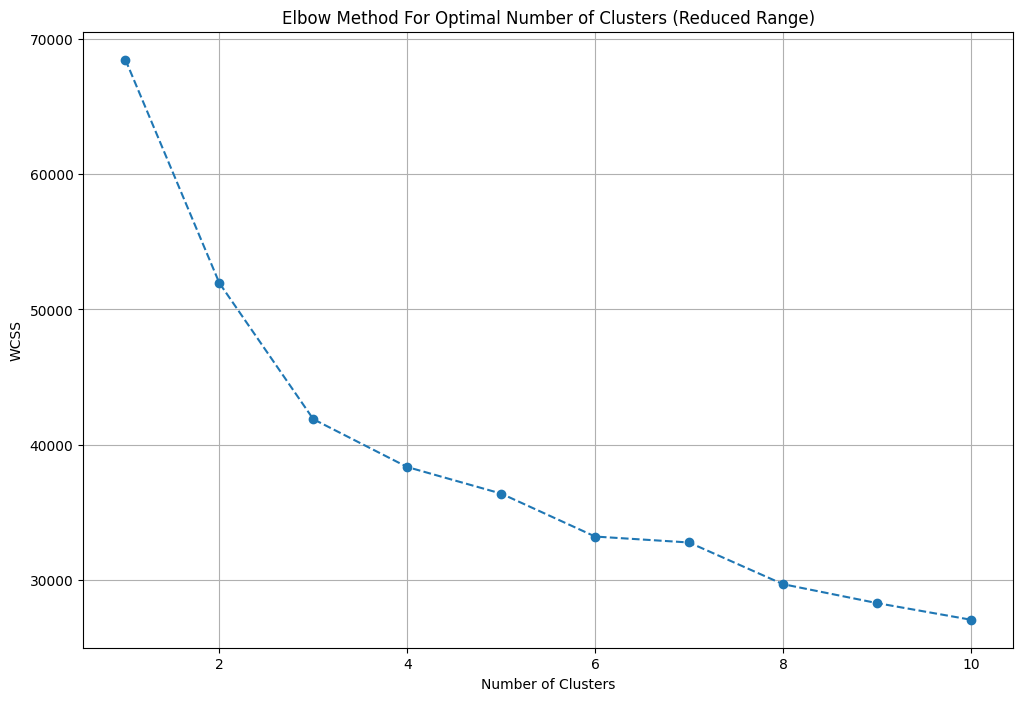

In [23]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [25]:
df = df.iloc[:,:-18]

In [26]:
df['furnishing_type'] = cluster_assignments

In [27]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1690,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1209,"['9 Wardrobe', '15 Fan', '1 Exhaust Fan', '12 Geyser', '60 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
826,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV']",1
3193,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '1 Stove', '9 Light', '1 AC', '1 Chimney', '5 Curtains', '1 Modular Kitchen', '1 TV', '3 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No Bed']",1
2192,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [29]:
df[['society','features']].sample(5)

,society,features
3113,m3m soulitude,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1472,antriksh heights,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']"
2145,parkwood westend,NaN
1050,dlf the ultima,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2645,independent,NaN


In [30]:
df['features'].isnull().sum()

635

In [32]:
import pandas as pd
app_df = pd.read_excel("D:/Github all files/Machine_learning_project2.0/Data_set/society_data.xlsx")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [33]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [34]:
temp_df = df[df['features'].isnull()]

In [35]:
temp_df.shape

(635, 27)

In [36]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [37]:
df.loc[temp_df.index,'features'] = x.values

In [38]:
df['features'].isnull().sum()

481

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [41]:
 ## Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [42]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1625,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
820,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
features_binary_df.shape

(3803, 130)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

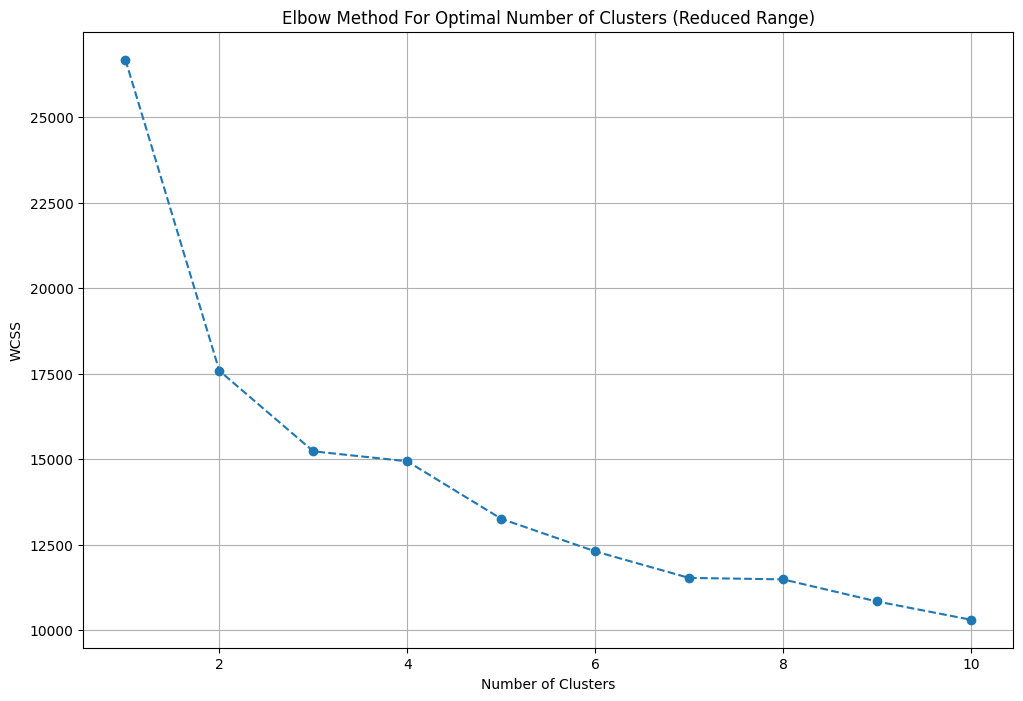

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [47]:
df['luxury_score'] = luxury_score

In [48]:
df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1789.0,NaN,NaN,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Piped-gas, Visitor Parking, Swimming Pool, Park, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",71
1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro Station', 'Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Jaipur Expressway', 'Hero Honda Chowk', 'S N International School', 'The NorthCap University', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park', 'InfinityS Badminton Academy', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lounge', 'Reading Lounge', 'Barbecue', 'Skating Rink', 'Fountain', 'Lawn Tennis Court', 'Amphitheatre']",NaN,4700.0,NaN,0,0,0,0,0,0,"[Bus Shelter, Swimming Pool, Business Lounge, Reading Lounge, Barbecue, Skating Rink, Fountain, Lawn Tennis Court, Amphitheatre]",61
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Shree Krishna Hospital Gurgaon', 'Kr Dental Hub', 'Dr. Hitesh Dawar', 'Sneh Hospital Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Esic Hospital Gurugram', 'Dr. Ashok Jain', 'Dr. Sindhu Clinic', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Dr. Mittal Clinic', 'Jiya Clinic', 'R K Hospital Gurgaon', 'Yashroop Medical Centre', ""Dr. Anurag's Child Care Clinic"", 'Taneja Hospital', 'Aryan Hospital', 'Chirag Hospital Pvt. Ltd', 'Geeta Nursing Home Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Bhatnagar Maternity and Nursing Home', 'Dr. Agya Ram Sharma Clinic', 'Dev Man Kathuria Clinic', 'GH Gurgaon', 'Swastik Maternity and Medical Centre', 'Bindal Clinic', 'Dr. Sarvejeet Singh', 'M.S Hospital', 'My Care Clinic', 'Satyam Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1 Exhaust Fan', '1 Stove', '4 Light', '2 AC', '1 Modular Kitchen', '1 Chimne

In [49]:
df.shape

(3803, 29)

In [50]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)